In [54]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
from scipy.interpolate import make_interp_spline
from scipy import stats

In [55]:
datos = pd.read_excel('datos_mov_viscoso.xlsx')
datos

,x,t_10,t_20,t_30,t_40,t_50
0,0,0.000000,0.000000,0.000000,0.000000,0.000000
1,10,3.600000,2.366667,1.833333,1.700000,1.466667
2,20,7.033333,4.666667,3.633333,3.266667,2.900000
3,30,10.433330,6.733333,5.400000,4.800000,4.333333
4,40,13.866670,8.833333,7.100000,6.366667,5.766667
5,50,17.233330,10.900000,8.800000,7.900000,7.166667
6,60,20.600000,13.000000,10.566670,9.466667,8.633333
7,70,24.033330,15.133330,12.266670,11.066670,10.066670
8,80,27.233330,17.233330,14.100000,12.666670,11.500000


In [56]:
x_m = datos['x']
t_10 = datos['t_10']
t_20 = datos['t_20']
t_30 = datos['t_30']
t_40 = datos['t_40']
t_50 = datos['t_50']


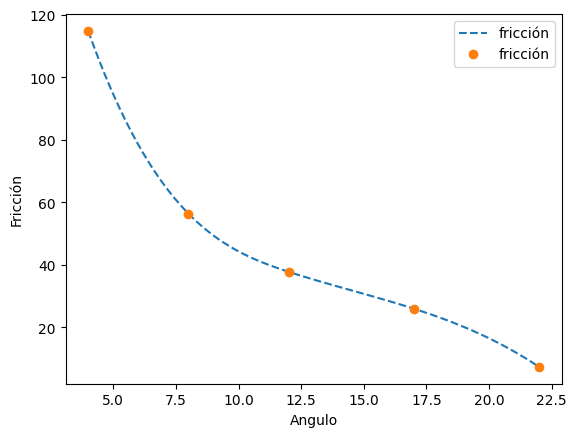

In [65]:
angulo =np.array([4,8,12,17,22])
friccion = np.array([114.84,56.41,37.79,25.99,7.36])

X_Y_Spline = make_interp_spline(angulo, friccion)

x = np.linspace(angulo.min(), angulo.max(), 500)
y = X_Y_Spline(x)

plt.plot(x, y, '--', label='fricción')
plt.plot(angulo, friccion, 'o', label='fricción')
plt.xlabel('Angulo')
plt.ylabel('Fricción')
plt.legend()
plt.savefig('friccion_vs_angulo.png',dpi = 300, bbox_inches = 'tight')
plt.show()

In [58]:
def regresion_1(t,gamma):
  slope, intercept, r, p, std_err = stats.linregress(t,gamma)
  def myfunc(x):
    return slope * x + intercept
  
  mymodel = list(map(myfunc, t))
  
  r_squared = r**2
  
  print('slope:', slope)
  print('intercept:', intercept)
  print('r:', r)
  print('R^2:', r_squared)
  print('p:', p)
  print('std_err:', std_err)
  return mymodel

In [59]:
t_reg_10 = regresion_1(t_10,x_m)
t_reg_20 = regresion_1(t_20,x_m)
t_reg_30 = regresion_1(t_30,x_m)
t_reg_40 = regresion_1(t_40,x_m)
t_reg_50 = regresion_1(t_50,x_m)

slope: 2.938466574797034
intercept: -0.4964193107226862
r: 0.9999473811843679
R^2: 0.9998947651374755
p: 3.479433724681301e-15
std_err: 0.011393952553334233
slope: 4.683293741251437
intercept: -1.039526130156112
r: 0.999811401333345
R^2: 0.9996228382361471
p: 3.0327916413146656e-13
std_err: 0.034383344781465076
slope: 5.715477455213667
intercept: -0.4528831322194762
r: 0.9999455999086605
R^2: 0.999891202776691
p: 3.9094240255267165e-15
std_err: 0.022533882638675038
slope: 6.364324320679599
intercept: -0.4723937866720931
r: 0.9999531554002622
R^2: 0.9999063129949409
p: 2.3164644008539326e-15
std_err: 0.023284306400398372
slope: 6.968552303266142
intercept: -0.13370221525779158
r: 0.9999936800035167
R^2: 0.9999873600469759
p: 2.0895044758790895e-18
std_err: 0.009364164163723977


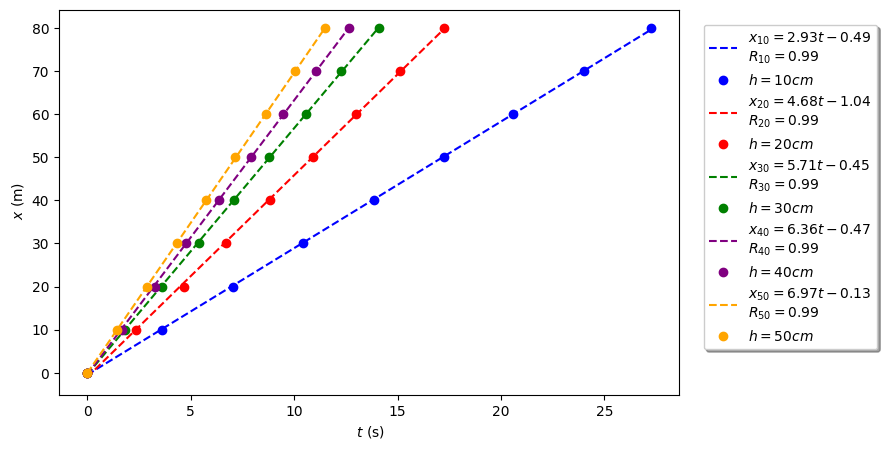

In [60]:
fig_4 = plt.figure(figsize=(8,5))
plt.plot(t_10,t_reg_10,linestyle='--', label=r'$x_{10} = 2.93t-0.49$'+ '\n' + r'$R_{10} = 0.99$', color='blue')
plt.plot(t_10,x_m, 'o', label=r'$h = 10 cm$',color='blue')
plt.plot(t_20,t_reg_20,linestyle='--', label=r'$x_{20} = 4.68t-1.04$'+ '\n' + r'$R_{20} = 0.99$', color='red')
plt.plot(t_20,x_m, 'o', label=r'$h = 20 cm$',color='red')
plt.plot(t_30,t_reg_30,linestyle='--', label=r'$x_{30} = 5.71t-0.45$'+ '\n' + r'$R_{30} = 0.99$', color='green')
plt.plot(t_30,x_m, 'o', label=r'$h = 30 cm$',color='green')
plt.plot(t_40,t_reg_40,linestyle='--', label=r'$x_{40} = 6.36t-0.47$'+ '\n' + r'$R_{40} = 0.99$', color='purple')
plt.plot(t_40,x_m, 'o', label=r'$h = 40 cm$',color='purple')
plt.plot(t_50,t_reg_50,linestyle='--', label=r'$x_{50} = 6.97t-0.13$'+ '\n' + r'$R_{50} = 0.99$', color='orange')
plt.plot(t_50,x_m, 'o', label=r'$h = 50 cm$',color='orange')
plt.xlabel(r' $t$ (s)')
plt.ylabel(r' $x$ (m)')
plt.legend(loc='lower center',bbox_to_anchor=(1.18,0.1), ncol=1,shadow=True, fancybox=True)
plt.savefig('datos_experimentales_viscoso_unificado.png', dpi = 300, bbox_inches = 'tight')
plt.show()


In [61]:

# def regresion_1(t):
#   slope, intercept, r, p, std_err = stats.linregress(t,x)
#   def myfunc(x):
#     return slope * x + intercept
  
#   mymodel = list(map(myfunc, t))
#   print('slope:', slope)
#   print('intercept:', intercept)
#   print('r:', r)
#   print('p:', p)
#   print('std_err:', std_err)
#   return mymodel


# # t_reg_10 = regresion_1(t_10)
# # t_reg_20 = regresion_1(t_20)
# # t_reg_30 = regresion_1(t_30)
# # t_reg_40 = regresion_1(t_40)
# # t_reg_50 = regresion_1(t_50)

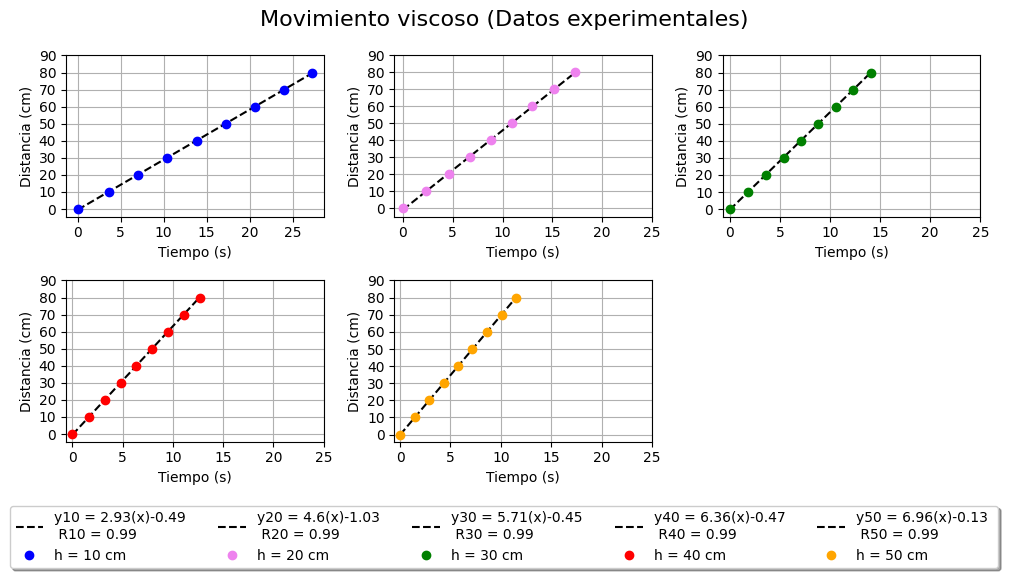

In [63]:
fig = plt.figure(figsize=(10, 5), layout='tight')
fig.suptitle('Movimiento viscoso (Datos experimentales)', fontsize=16)
spec = fig.add_gridspec(2,3)
ax1 = fig.add_subplot(spec[0, 0])
ax1.plot(t_10,t_reg_10,linestyle='--', label='y10 = 2.93(x)-0.49 \n R10 = 0.99', color='black')
ax1.plot(t_10,x_m, 'o', label='h = 10 cm',color='blue')
ax1.set_xticks(np.arange(0, 30, 5))
ax1.set_yticks(np.arange(0, 95, 10))
ax1.set_ylabel('Distancia (cm)')
ax1.set_xlabel('Tiempo (s)')
ax1.grid(True)
ax2 = fig.add_subplot(spec[0, 1])
ax2.plot(t_20,t_reg_20,linestyle='--', label='y20 = 4.6(x)-1.03 \n R20 = 0.99', color='black')
ax2.plot(t_20,x_m, 'o', label='h = 20 cm',color='violet')
ax2.set_xticks(np.arange(0, 30, 5))
ax2.set_yticks(np.arange(0, 95, 10))
ax2.set_ylabel('Distancia (cm)')
ax2.set_xlabel('Tiempo (s)')
ax2.grid(True)
ax3 = fig.add_subplot(spec[0, 2])
ax3.plot(t_30,t_reg_30,linestyle='--', label='y30 = 5.71(x)-0.45 \n R30 = 0.99', color='black')
ax3.plot(t_30,x_m, 'o', label='h = 30 cm', color='green')
ax3.set_xticks(np.arange(0, 30, 5))
ax3.set_yticks(np.arange(0, 95, 10))
ax3.set_ylabel('Distancia (cm)')
ax3.set_xlabel('Tiempo (s)')
ax3.grid(True)
ax4 = fig.add_subplot(spec[1, 0])
ax4.plot(t_40,t_reg_40,linestyle='--', label='y40 = 6.36(x)-0.47 \n R40 = 0.99', color='black')
ax4.plot(t_40,x_m, 'o', label='h = 40 cm', color='red')
ax4.set_xticks(np.arange(0, 30, 5))
ax4.set_yticks(np.arange(0, 95, 10))
ax4.set_ylabel('Distancia (cm)')
ax4.set_xlabel('Tiempo (s)')
ax4.grid(True)
ax5 = fig.add_subplot(spec[1, 1])
ax5.plot(t_50,t_reg_50,linestyle='--', label='y50 = 6.96(x)-0.13 \n R50 = 0.99', color='black')
ax5.plot(t_50,x_m, 'o', label='h = 50 cm', color='orange')
ax5.set_xticks(np.arange(0, 30, 5))
ax5.set_yticks(np.arange(0, 95, 10))
ax5.set_ylabel('Distancia (cm)')
ax5.set_xlabel('Tiempo (s)')
ax5.grid(True)
ax6 = fig.add_subfigure(spec[1,2])
fig.legend(loc='lower center',bbox_to_anchor=(0.5, -0.15), ncol=5,shadow=True, fancybox=True)
plt.savefig('datos_experimentales_viscoso.png', dpi = 300, bbox_inches = 'tight')
plt.show()